# 1. Business Problem
## 1.1 Problem Context
Our client is a large Real Estate Investment Trust (REIT).

-  They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.
-  As part of their business, they try to predict the fair transaction price of a property before it's sold.
-  They do so to calibrate their internal pricing models and keep a pulse on the market.

## 1.2 Problem Statement
The REIT has hired us to find a data-driven approach to valuing properties.

-  They currently have an untapped dataset of transaction prices for previous properties on the market.
-  The data was collected in 2016.
-  Our task is to build a real-estate pricing model using that dataset.
-  If we can build a model to predict transaction prices with an average error of under US Dollars 70,000, then our client will be very satisfied with the our resultant model.

## 1.3 Business Objectives and Constraints
-  Deliverable: Trained model file
-  Win condition: Avg. prediction error < $70,000
-  Model Interpretability will be useful
-  No latency requirement

# 2. Machine Learning Problem
## 2.1 Data Overview
For this project:

1. The dataset has 1883 observations in the county where the REIT operates.
2. Each observation is for the transaction of one property only.
3. Each transaction was between $200,000 and $800,000.

**Target Variable**
- 'tx_price' - Transaction price in USD

**Features of the data:**
Public records:

- 'tx_year' - Year the transaction took place
- 'property_tax' - Monthly property tax
- 'insurance' - Cost of monthly homeowner's insurance

Property characteristics:

- 'beds' - Number of bedrooms
- 'baths' - Number of bathrooms
- 'sqft' - Total floor area in squared feet
- 'lot_size' - Total outside area in squared feet
- 'year_built' - Year property was built
- 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
- 'basement' - Does the property have a basement?
- 'exterior_walls' - The material used for constructing walls of the house
- 'roof' - The material used for constructing the roof

Location convenience scores:

- 'restaurants' - Number of restaurants within 1 mile
- 'groceries' - Number of grocery stores within 1 mile
- 'nightlife' - Number of nightlife venues within 1 mile
- 'cafes' - Number of cafes within 1 mile
- 'shopping' - Number of stores within 1 mile
- 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
- 'beauty_spas' - Number of beauty and spa locations within 1 mile

Neighborhood demographics:

- 'median_age' - Median age of the neighborhood
- 'married' - Percent of neighborhood who are married
- 'college_grad' - Percent of neighborhood who graduated college

Schools:

- 'num_schools' - Number of public schools within district
- 'median_school' - Median score of the public schools within district, on the range 1 - 10

## 2.2 Mapping business problem to ML problem

It is a regression problem, where given the above set of features, we need to predict the transaction price of the house.

### 2.2.1 Performance Metric (KPI)
**Since it is a regression problem, we will use the following regression metrics:**
#### 2.2.1.1 Root Mean Squared Error (RMSE)

![title](Images/rmse.gif)

#### 2.2.1.2 R-squared
![title](Images/r_squared.png)

The value of R suared must be at least greater than 0 and 1 in the best case

#### 2.2.1.3 Mean Absolute Error (MAE):
![title](Images/mae.png)

* Remember, our win-condition for this project is predicting within \$70,000 of true transaction prices, on average.
* Mean absolute error (or MAE) is the average absolute difference between predicted and actual values for our target variable. That exactly aligns with the terms of our win condition!
* So we're aiming to get MAE below 70,000

## 2.3 Train-Test Splits
**80-20**

# 3. Exploratory Data Analysis (EDA)

**Import the libraries**

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.set_printoptions(precision=4, suppress=True)   # to set floating point precision

## 3.1 Load real estate data from CSV


In [3]:
df = pd.read_csv('Files/real_estate_data.csv')

In [4]:
df.shape

(1883, 26)

In [5]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', 26) # display max 26 columns
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


Check out the categorical features

In [7]:
df.dtypes[df.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

## 3.2 Distributions of numeric features

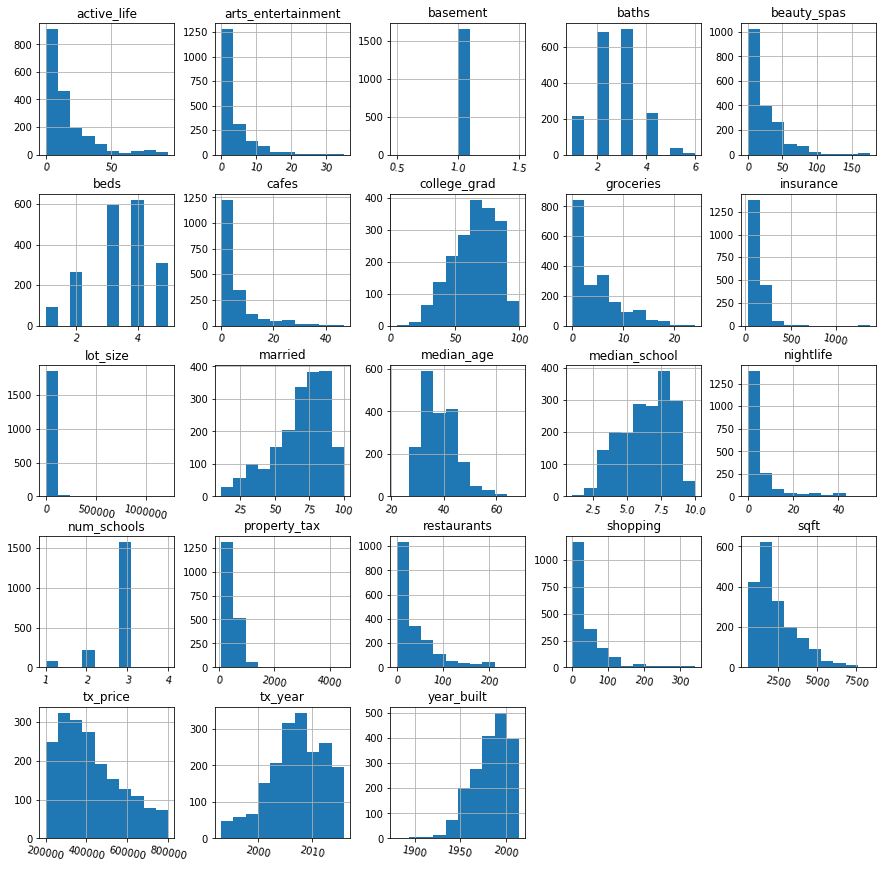

In [8]:
# Plot a histogram grid
df.hist(figsize=(15,15), xrot=-10)

# Clear the text "residue"
plt.show()

**Observations:**
Some of them are as follows-

Considering the histogram for beds:
* Less then 100 houses have 1 bedroom.
* Over 400 houses have 4 bedrooms and so on.

Considering the histogram for num_schools:
* Over 1500 houses have 3 schools in their locality.

Also, the histogram for tx_year:
* 


Display summary statistics for the numerical features.

In [9]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


**Observations** :

 * On looking at the year built column, we can see that its max value is 2015.
 * The min and max values of the feature 'basement' is 1.0 and it has a standard deviation of 0.0. Since it also contains Nan values in the dataset, this feature could be binary indicating a basement=yes or a basement=no

## 3.3 Distributions of categorical features

**Bar plot for 'property_type' feature**

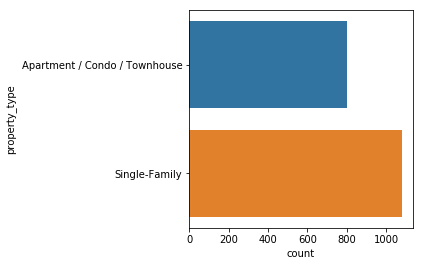

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(y='property_type', data=df)

**Bar plot for 'exterior_walls' feature**

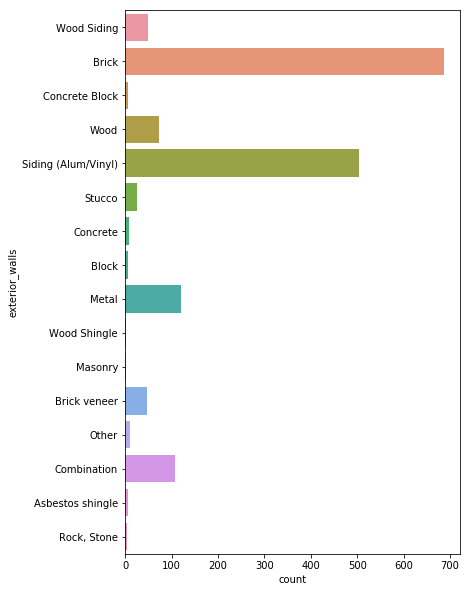

In [11]:
plt.figure(figsize=(6,10))
sns.countplot(y='exterior_walls', data=df)

**Bar plot for 'roof' feature**

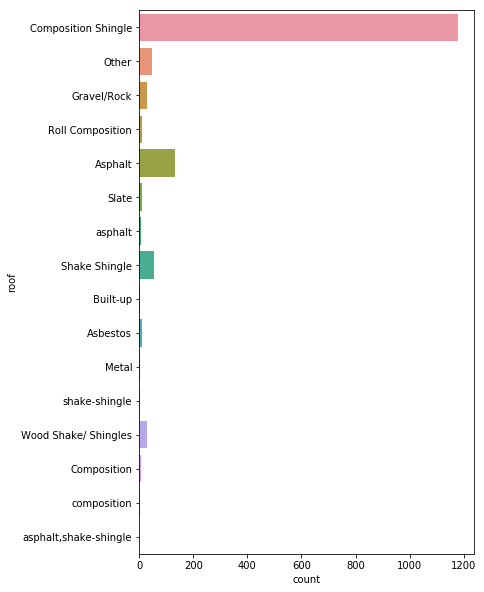

In [12]:
plt.figure(figsize=(6,10))
sns.countplot(y='roof', data=df)

**Observations:**
Take a look at the frequencies of the classes for all the three features.

Several classes are quite prevalent in the dataset. They have long bars. For example:
* 'Apartment'
* 'Siding (Alum/Vinyl)'
* 'MAsphaly'
* 'Combination'

On the flipside, some classes have really short bars. For example:
* 'Concrete Block'
* 'Block'
* 'Asbestos'
* etc...
* As don't have many observations, they are called **sparse classes**.

Display summary statistics for categorical features.

In [13]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


**Observations :**

* 'exterior_walls' and 'roof' have missing values.
* There are 2 unique classes for 'property_type' and the most frequent one is 'Single-Family'.
* There are 16 unique classes for 'exterior_walls' and the most frequent one is 'Brick'.

## 3.4 Sparse Classes

Sparse classes are classes in categorical features that have a very small number of observations.

They tend to be problematic when we get to building models.
* In the best case, they don't influence the model much.
* In the worst case, they can cause the model to be overfit.

#### Referring to the bar plot above for each categorical feature

**Observations:** In both 'exterior_walls' and 'roof' as well we have many sparse classes

## 3.5 Segmentations
Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

**Segmenting the target variable by key categorical features.**

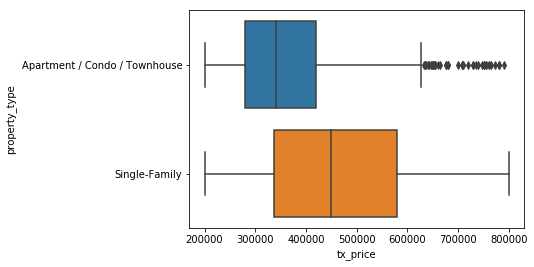

In [14]:
sns.boxplot(y='property_type', x='tx_price', data=df)

**Observation:** In general, it looks like single family homes are more expensive.

Comparing the two property types across other features as well

In [15]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


**Observations :**

* On an average, single-family homes are larger.
* Also, single family homes have larger lot_size.
* Apartments/Townhouse are more exposed to grocery/restaurants/nightlife options.
* All these seem intuitive since larger homes are usually located in areas that have more vacant space away from the usually crowded apartment area.

Now we will segment 'sqft' by 'property_type' and plot the boxplots.

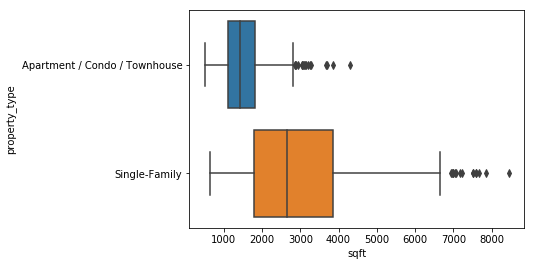

In [16]:
sns.boxplot(y='property_type', x='sqft', data=df)

* Single-Family homes are larger and show greater variance in sizes.
* On the other hand, Apartments are not much size variant and tend to remain in particular area(sqft).

In [17]:
df.groupby('property_type').agg([np.mean, np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement    ...     \
                                       mean           std     mean    ...      
property_type                                                         ...      
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0    ...      
Single-Family                  20417.666667  44165.529302      1.0    ...      

                                 married college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47.118015   
Single-Family                  244.351559  166.329630  77.816022   

                              median_school           num_schools            \
                                       mean       std        mean       std   
property_type                                                                 
Apartment / Condo / Townhouse      6.382316  1.941998    2.831880  0.455370   
Single-Family                      6.592593  2.031663    2.764815  0.537959   

                                   tx_year            
                                      mean       std  
property_type                                         
Apartment / Condo / Townhouse  2007.941469  4.099487  
Single-Family                  2006.494444  5.807059  

[2 rows x 46 columns]

## 3.6 Correlations

* **Correlation** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [18]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


The correlations for 'basement' all show as NaN. This is expected because right now that feature doesn't vary at all (its standard deviation is 0), as we saw all the way back in step 3.2

**Lets visualize this**

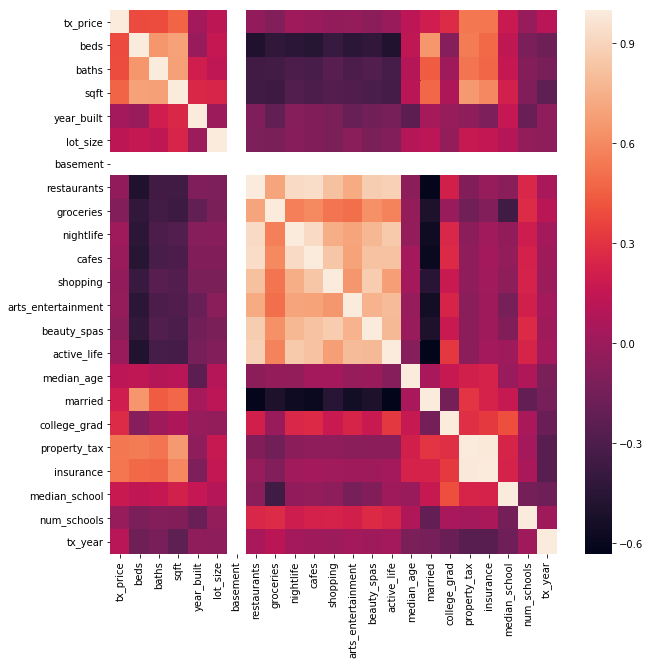

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* One of the ways is to first find features that are correlated with our target variable by scanning the first column.
* In this case, it doesn't look like many features are strongly correlated with the target variable.
* Also there is a weak positive correlation between 'tx_price' and 'property_tax'.

**A fancy visualization of the heatmap**

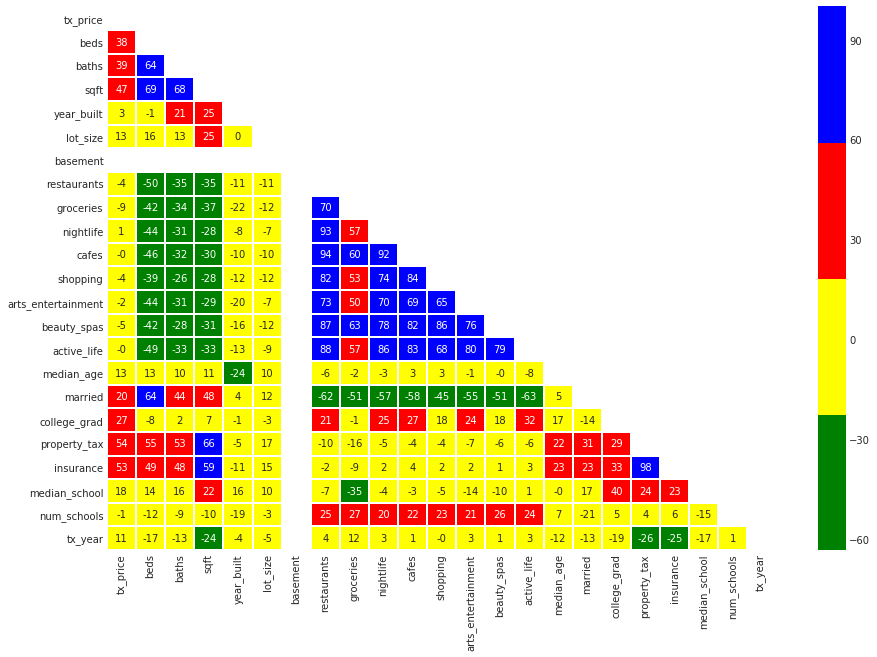

In [20]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# 4. Data Cleaning

## 4.1 Dropping the duplicates (De-duplication)

In [21]:
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


It looks like we didn't have any duplicates in our original dataset. Even so, it's a good idea to check this as an easy first step for cleaning your dataset.

## 4.2 Fix structural errors

The 'basement' feature had some Nan values

In [22]:
df.basement.unique()

array([ nan,   1.])

* Even though NaN represents "missing" values, those are actually meant to indicate properties without basements.
* Fill missing 'basement' values with the value 0 to turn 'basement' into a true indicator variable.

In [23]:
df.basement.fillna(0, inplace=True)

In [24]:
df.basement.unique()

array([ 0.,  1.])

## 4.3 Typos and capitalization

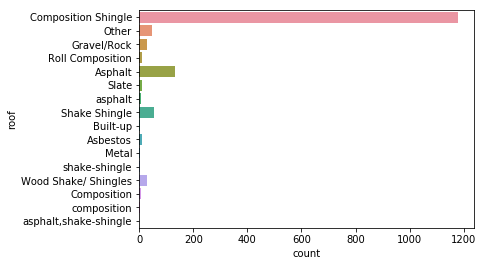

In [25]:
sns.countplot(y='roof', data=df)

Using this plot, we can easily catch typos and inconsistent capitalization. For example:
* 'composition' should be 'Composition'
* 'asphalt' should be 'Asphalt'
* 'shake-shingle' should be 'Shake Shingle'
* 'asphalt,shake-shingle' could probably just be 'Shake Shingle'

In [26]:
# After modifications
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

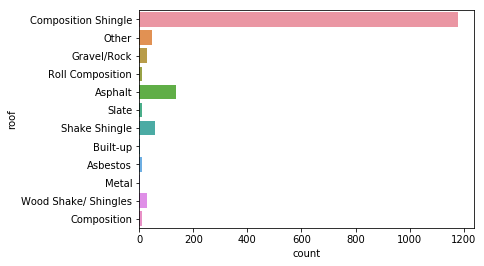

In [27]:
# Class distribution for 'roof' after the modifications
sns.countplot(y='roof', data=df)

## 4.4 Mislabeled classes


Finally, we'll check for classes that are labeled as separate classes when they should really be the same.

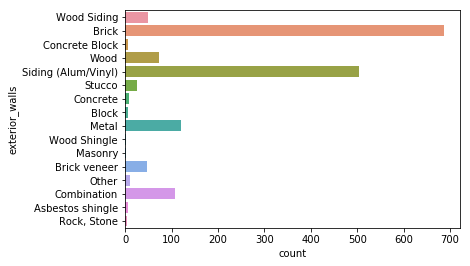

In [28]:
sns.countplot(y='exterior_walls', data=df)

Using that chart, we can easily catch mislabeled classes. For example
* 'Rock, Stone' should be 'Masonry'
* 'Concrete' and 'Block' should both just be 'Concrete Block'

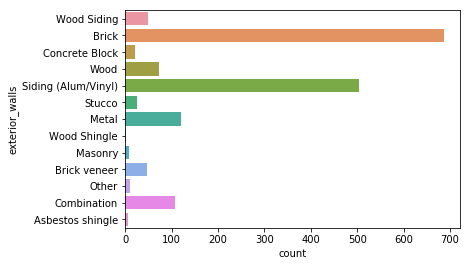

In [29]:
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls', data=df)

## 4.5 Removing Outliers

* Outliers can cause problems with certain types of models.
* Boxplots are a nice way to detect outliers
* Let's start with a box plot of our target variable, since that's what we are actually trying to predict.

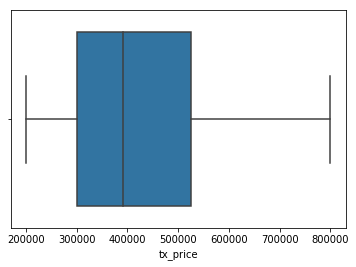

In [30]:
sns.boxplot(df.tx_price)

**Interpretation**

* The two vertical bars on the ends are the min and max values. All properties sold for between \$200,000 and \$800,000.
* The box in the middle is the interquartile range, IQR (25th percentile to 75th percentile).
* Half of all observations fall in that box.
* Finally, the vertical bar in the middle of the box is the median.

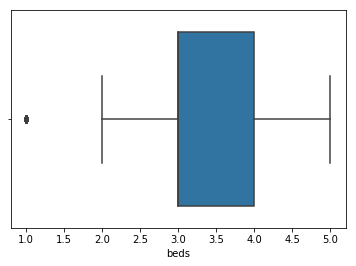

In [31]:
## Checking outliers in number of bedrooms
sns.boxplot(df.beds)

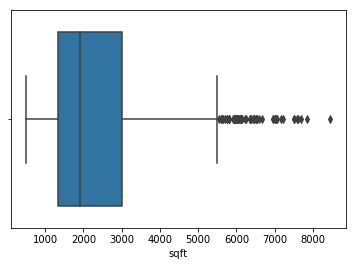

In [32]:
## Checking outliers in size of the house
sns.boxplot(df.sqft)

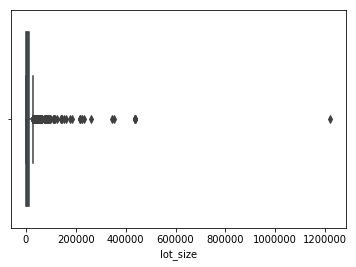

In [33]:
## Checking outliers in lot size
sns.boxplot(df.lot_size)

Look at the dot on the extreme right. This might indicate some erroneous point or an outlier.
Let's look at the largest 5 lot sizes just to confirm.

In [34]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [35]:
## Remove observations with lot_size greater than 500,000 sqft.
df = df[df.lot_size <= 500000]
df.shape

(1882, 26)

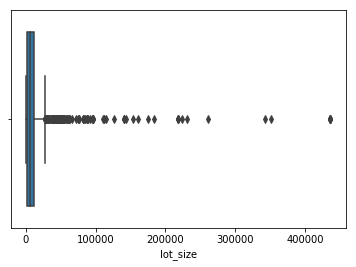

In [36]:
## Plotting the boxplot of lot size after the change
sns.boxplot(df.lot_size)

**Note:** Even though visually the plot looks the same but the x-axis dimensions have changed

## 4.6 Label missing categorical data

In [37]:
# Display number of missing values for categorical feature
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

#### The best way to handle missing data for categorical features is to simply label them as 'Missing'!

In [38]:
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')
df['roof'] = df['roof'].fillna('Missing')
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

## 4.7 Flag and fill missing numeric data

In [39]:
# Display number of missing values for numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.

**Save the cleaned dataframe to new file**

In [40]:
df.to_csv('Files/cleaned_df.csv', index=None)

# 5. Feature Engineering
* Feature engineering is the practice of creating new features from existing ones.
*  Often, feature engineering is one of the most valuable tasks to improve model effectiveness.

## 5.1 Indicator variables

* For example, let's say you knew that homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
* Maybe you suspect these types of properties command premium prices. (You don't need to know for sure.)
* Create an indicator variable to flag properties with 2 beds and 2 baths and name it 'two_and_two'.

In [41]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [42]:
# Display percent of rows where two_and_two == 1
df[df['two_and_two']==1].shape[0]/df.shape[0]

0.09458023379383634

The interpretation is that almost 9.5% of the observations in our dataset were for properties with 2 beds and 2 baths.

* People might also not take much interest in properties that were built way back.
* Lets figure out such points.

In [43]:
df['old_properties'] = (df.year_built < 1980) .astype(int)

In [44]:
# Display percent of rows where old_properties == 1
df[df['old_properties']==1].shape[0]/df.shape[0]

0.3783209351753454

### Example: housing market recession
According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).
![title](Images/zillow-housing-prices.png)

Create a new feature called 'during_recession' to indicate if a transaction falls between 2010 and 2013

In [45]:
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [46]:
# Print percent of transactions where during_recession == 1
df[df['during_recession']==1].shape[0]/df.shape[0]

0.2635494155154091

## 5.2 Interaction features

* Interaction features are operations between two or more other features.

* For example, in our dataset, we know the transaction year and the year the property was built in.
* However, the more useful piece of information that combining these two features provides is the age of the property at the time of the transaction.

In [47]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

**Note:** 'property_age' denotes the age of the property when it was sold and not how old it is today, since we want to predict the price at the time when the property is sold.

**Sanity Check:** It's always nice to do a quick sanity check after creating a feature

In [48]:
print(df.property_age.min())

-8


Age of property can never be negative.

In [49]:
# Number of observations with 'property_age' < 0
print(sum(df.property_age < 0))

19


* On second thought, it's possible that some home owners bought houses before the construction company built them.
* This is not uncommon, especially with single-family homes.
* However, for this problem, **we are only interested in houses that already exist** because the REIT only buys existing ones!

In [50]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]
df.shape

(1863, 30)

* We  know the number of schools nearby 'num_schools'
* We also have their median quality score 'median_schools'
* But what if it's the **interaction** of those two factors that's really important? 

We can represent this with an interaction feature.

In [51]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [52]:
# Display median school score
df.school_score.median()

18.0

## 5.3 Handling Sparse Classes
* Sparse classes are those that have very few total observations.
* At best, they are ignored.
* At worst, they can cause models to be overfit.\

The easiest way to check for sparse classes is simply by plotting the distributions of your categorical features. We already did this during exploratory analysis, but since we've done some data cleaning since then, let's plot them again.

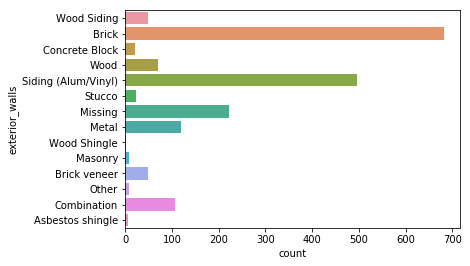

In [53]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

Let's group 'Wood Siding', 'Wood Shingle' and 'Wood' together. Label all of them as 'Wood'.

In [54]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)

Next, we can group the remaining sparse classes into a single 'Other' class, even though there's already an 'Other' class.<br>
Let's label 'Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', and 'Masonry' as 'Other':

In [55]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

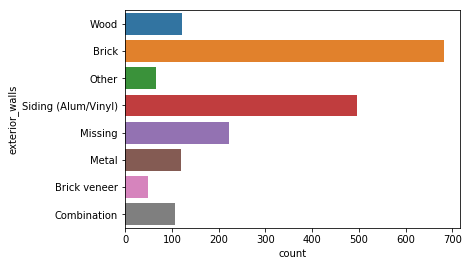

In [56]:
sns.countplot(y='exterior_walls', data=df)

Similarly we check for 'roof'

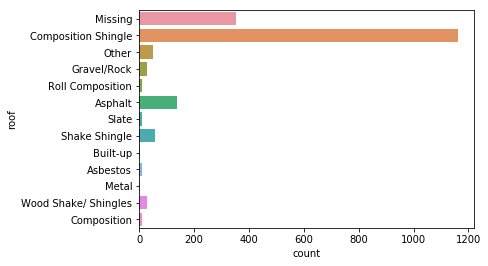

In [57]:
sns.countplot(y='roof', data=df)

Group 'Composition', 'Roll Composition' and 'Wood Shake/ Shingles' into the 'Composition Shingle' class.

In [58]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles','Roll Composition'], 'Composition Shingle', inplace=True)

Next, let's group remaining sparse classes into a single 'Other' class.

Label 'Gravel/Rock', 'Slate', 'Built-up', 'Asbestos', and 'Metal' as 'Other'.

In [59]:
other_roof = ['Other', 'Gravel/Rock', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

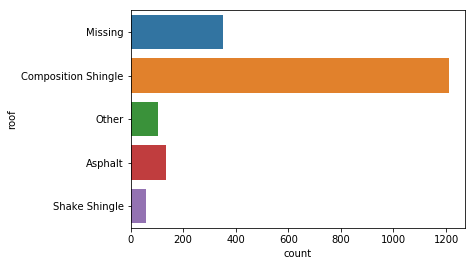

In [60]:
sns.countplot(y='roof', data=df)

In [61]:
df[(df['property_type']=='Apartment / Condo / Townhouse') & (df['basement']==1.0)].shape[0]/df.shape[0]

0.3376274825550188

In [62]:
df[(df['property_type']=='Single-Family') & (df['basement']==1.0)].shape[0]/df.shape[0]

0.5415995705850778

## 5.4 Encode dummy variables (One Hot Encoding)
* Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
* Therefore, we need to create dummy variables for our categorical features.

In [63]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

Let's display the first 5 rows again to see these new features<br>
Check dummy variables created for 'exterior_walls', 'roof' and 'property_type'

In [64]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,...,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,...,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,...,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,...,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,...,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,...,0,0,0,0,0,0,0,0,1,0,0,1,0


## 5.5 Remove unused or redundant features
* Unused features are those that don't make sense to pass into our machine learning algorithms.
* For example, since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we might consider removing them.

In [65]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)  ## axis=1 because we are dropping columns.

Also we can consider removing some other features 

In [66]:
df = df.drop(['exterior_walls_Missing', 'exterior_walls_Other','roof_Missing','roof_Other','property_type_Single-Family'], axis=1)

Let's save our new DataFrame we that augmented through feature engineering. We'll call it the **analytical base table** because we'll be building our models on it.

In [67]:
# Save analytical base table
df.to_csv('Files/analytical_base_table.csv', index=None)

# 6. Machine Learning Models
## 6.1 Data Preparation

In [3]:
df = pd.read_csv("Files/analytical_base_table.csv")

In [4]:
print(df.shape)

(1863, 36)


### 6.1.1 Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [5]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [6]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Check its shape

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1490, 35) (373, 35) (1490,) (373,)


### 6.1.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [8]:
train_mean = X_train.mean()
train_std = X_train.std()

In [9]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [10]:
## Check for mean and std dev.
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,...,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,...,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,-1.902281e-16,-4.254613e-17,7.663519e-17,3.911860e-17,9.746119e-17,1.409760e-16,1.621373e-16,2.827995e-16,8.946050e-18,2.315448e-17,...,1.457447e-16,1.207088e-17,4.798548e-17,1.039437e-16,1.359092e-16,-2.747988e-16,-8.278240e-17,1.718238e-16,7.708226e-17,8.941393e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268801e+00,-1.697190e+00,-1.405276e+00,-3.662250e-01,-2.688343e+00,-8.405927e-01,-9.756023e-01,-5.928336e-01,-6.967768e-01,-7.559221e-01,...,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.365332e+00,-1.862765e-01,-8.497402e-01
25%,-4.047185e-01,-6.224713e-01,-7.491974e-01,-3.219217e-01,3.717266e-01,-7.128947e-01,-7.532980e-01,-5.928336e-01,-6.967768e-01,-6.412758e-01,...,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.365332e+00,-1.862765e-01,-8.497402e-01
50%,5.273226e-01,4.522474e-01,-3.155383e-01,-1.885809e-01,3.717266e-01,-3.936498e-01,-3.086896e-01,-3.559228e-01,-2.936977e-01,-3.737676e-01,...,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,7.319308e-01,-1.862765e-01,-8.497402e-01
75%,5.273226e-01,4.522474e-01,5.334699e-01,-2.831904e-02,3.717266e-01,3.512552e-01,5.805274e-01,1.178989e-01,1.093814e-01,1.994641e-01,...,1.333663e+00,-1.572980e-01,-2.504503e-01,-2.652453e-01,1.650203e+00,-2.652453e-01,-2.808475e-01,7.319308e-01,-1.862765e-01,1.176040e+00
max,1.459364e+00,3.676403e+00,4.255036e+00,1.217405e+01,3.717266e-01,4.820685e+00,4.359699e+00,5.685304e+00,5.618130e+00,5.740705e+00,...,1.333663e+00,6.353092e+00,3.990129e+00,3.767565e+00,1.650203e+00,3.767565e+00,3.558261e+00,7.319308e-01,5.364762e+00,1.176040e+00


In [76]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [77]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,...,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,-0.117360,-0.080790,-0.090918,-0.032233,0.010753,0.091066,0.141283,0.056925,0.109381,0.132152,0.048019,0.107741,0.034946,...,-0.025074,0.012619,0.032942,0.066008,0.052152,-0.045811,-0.027385,-0.025002,-0.005761,-0.002950,0.000981,-0.052337,0.111555
std,0.958651,0.989343,1.001612,1.034313,0.988393,1.003586,0.996496,1.034407,1.077763,1.121003,1.013148,1.018536,0.922012,...,0.987285,0.972418,1.011310,1.017999,1.150338,0.910017,0.951364,0.987522,0.990833,0.996149,1.000695,0.852944,1.012934
min,-2.268801,-1.697190,-1.261108,-0.366225,-2.688343,-0.840593,-0.975602,-0.592834,-0.696777,-0.755922,-0.716224,-0.890568,-0.876172,...,-0.601441,-1.147796,-2.315581,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.280848,-1.365332,-0.186276,-0.849740
25%,-0.404719,-0.622471,-0.803935,-0.324824,0.371727,-0.627763,-0.753298,-0.474378,-0.562417,-0.564845,-0.716224,-0.657327,-0.542826,...,-0.601441,-0.912047,-0.920678,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.280848,-1.365332,-0.186276,-0.849740
50%,-0.404719,-0.622471,-0.386851,-0.266126,0.371727,-0.287235,-0.086385,-0.355923,-0.293698,-0.259121,-0.290121,-0.229719,-0.265037,...,-0.601441,-0.157651,0.009258,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.280848,0.731931,-0.186276,-0.849740
75%,0.527323,0.452247,0.306233,-0.062883,0.371727,0.500236,0.580527,0.117899,0.243741,0.333218,0.349032,0.586625,0.346099,...,1.661557,0.691044,0.939193,1.333663,-0.157298,-0.250450,-0.265245,1.650203,-0.265245,-0.280848,0.731931,-0.186276,1.176040
max,1.459364,3.676403,4.127830,12.149022,0.371727,4.820685,3.915091,5.803759,5.349410,5.740705,6.740566,5.912295,4.012912,...,1.661557,3.284280,1.869129,1.333663,6.353092,3.990129,3.767565,1.650203,3.767565,3.558261,0.731931,5.364762,1.176040


## 6.3 Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [78]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [79]:
np.ones(y_train.shape[0])*y_train.mean()

array([ 425455.4181,  425455.4181,  425455.4181, ...,  425455.4181,
        425455.4181,  425455.4181])

In [80]:
y_train.mean()

425455.41812080535

In [81]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [82]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  153791.70506675562
R-squared:  0.0
Mean Absolute Error:  127271.757171


In [83]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  143268.37228905046
R-squared:  -0.00731881601388
Mean Absolute Error:  120855.475979


## 6.3 Model-2 Ridge Regression

In [84]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=30, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=30, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [85]:
model.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [87]:
## Predict Test results
y_pred = model.predict(X_test)

In [88]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  118418.07044886502
R-squared:  0.407115445316
Mean Absolute Error:  92465.6067599


In [89]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  109589.97759607548
R-squared:  0.410602934727
Mean Absolute Error:  85270.4502693


### Feature Importance

In [90]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
sqft
college_grad
old_properties
insurance
property_age
property_tax
baths
beds
property_type_Apartment / Condo / Townhouse
exterior_walls_Brick
beauty_spas
exterior_walls_Wood
cafes
groceries
during_recession
lot_size
exterior_walls_Brick veneer
shopping
restaurants
nightlife
two_and_two
active_life
school_score
num_schools
roof_Asphalt
roof_Composition Shingle
exterior_walls_Combination
arts_entertainment
exterior_walls_Siding (Alum/Vinyl)
median_school
basement
exterior_walls_Metal
median_age
married
roof_Shake Shingle


## 6.4 Model-3 Support Vector Regression
With an RBF Kernel

In [92]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [93]:
model.best_estimator_

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [94]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [96]:
## Predict Test results
y_pred = model.predict(X_test)

In [97]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  104415.61859736001
R-squared:  0.539038018666
Mean Absolute Error:  76052.4499754


In [98]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  101187.11700967113
R-squared:  0.497522363745
Mean Absolute Error:  73489.5280969


## 6.5 Model-4 Random Forest Regression

In [99]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500, 600], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [1, 2, 4, 6, 8]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=30, scoring = 'neg_mean_absolute_error', cv=12, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=12, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [1, 2, 4, 6, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [100]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [102]:
## Predict Test results
y_pred = model.predict(X_test)

In [103]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  72742.55166750372
R-squared:  0.776276688751
Mean Absolute Error:  53315.7131667


In [104]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  93416.74199854233
R-squared:  0.571731900398
Mean Absolute Error:  68346.5925404


In [105]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=600, min_samples_split=12, min_samples_leaf=6)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [106]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
insurance
property_tax
property_age
sqft
lot_size
during_recession
college_grad
median_age
married
beauty_spas
active_life
shopping
restaurants
school_score
baths
median_school
groceries
arts_entertainment
cafes
nightlife
old_properties
beds
exterior_walls_Siding (Alum/Vinyl)
exterior_walls_Brick
roof_Composition Shingle
exterior_walls_Metal
exterior_walls_Brick veneer
num_schools
roof_Asphalt
roof_Shake Shingle
property_type_Apartment / Condo / Townhouse
basement
two_and_two
exterior_walls_Combination
exterior_walls_Wood


## 6.6 Model-5 XGBoost Regression

In [119]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.125, 0.15, 0.2], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=50, scoring = 'neg_mean_absolute_error', cv=25, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=25, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.125, 0.15, 0.2], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [120]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [121]:
# Predict Train results
y_train_pred = model.predict(X_train)

In [122]:
# Predict Test results
y_pred = model.predict(X_test)

In [123]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  80369.34487896068
R-squared:  0.726904192731
Mean Absolute Error:  60276.4547924


In [124]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  94025.79569240587
R-squared:  0.566129295075
Mean Absolute Error:  68133.4314259


In [125]:
# Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=4,learning_rate=0.03, n_estimators=300, reg_lambda=10.0)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
# Function to include figsize parameter
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

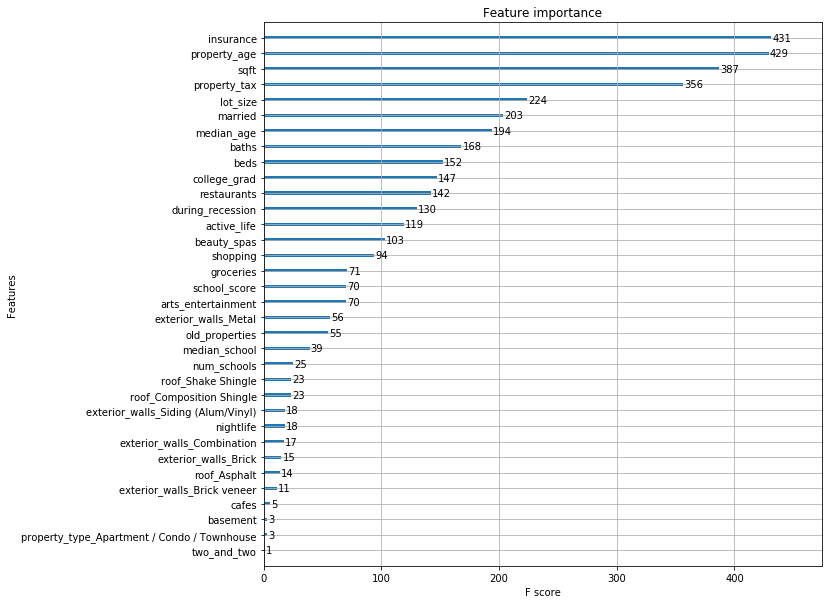

In [127]:
my_plot_importance(model, (10,10))

## 6.7 Model-6 Lasso Regression

In [128]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [129]:
model.best_estimator_

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [131]:
## Predict Test results
y_pred = model.predict(X_test)

In [132]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  118449.57971825218
R-squared:  0.406799887994
Mean Absolute Error:  92534.469084


In [133]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  109623.06875328255
R-squared:  0.410246939115
Mean Absolute Error:  85102.104501


### Feature Importance

In [134]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1000)
model.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
insurance
sqft
old_properties
college_grad
property_age
baths
beds
property_type_Apartment / Condo / Townhouse
groceries
exterior_walls_Brick
exterior_walls_Wood
during_recession
lot_size
nightlife
cafes
beauty_spas
exterior_walls_Brick veneer
num_schools
shopping
two_and_two
school_score
exterior_walls_Combination
roof_Asphalt
roof_Composition Shingle
restaurants
active_life
basement
median_school
arts_entertainment
median_age
roof_Shake Shingle
property_tax
exterior_walls_Metal
exterior_walls_Siding (Alum/Vinyl)
married


## 6.8 Model-7 DecisionTree  Regression

In [149]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [150]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [151]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [152]:
## Predict Test results
y_pred = model.predict(X_test)

In [153]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  100372.4809193144
R-squared:  0.574045222404
Mean Absolute Error:  74605.4286402


In [154]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  108151.33585006389
R-squared:  0.425975975869
Mean Absolute Error:  81090.7623862


## 6.9 Model-8 KN  Regression

In [157]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.


In [158]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=17, p=2,
          weights='uniform')

In [160]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [161]:
## Predict Test results
y_pred = model.predict(X_test)

In [162]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  117145.28229123299
R-squared:  0.419791906442
Mean Absolute Error:  92181.8179234


In [163]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  109310.51680178102
R-squared:  0.41360509535
Mean Absolute Error:  86219.7877306


## Model comparison

![title](Images/img2.PNG)

Our goal was to build a model to predict transaction prices with an average error of under US Dollars 70,000.<br>
When comapared, Random Forest and Xgboost both give almost the same test error values of 68,000 Dollars(MAE). However the gap betwen training and testing errors in Random Forest is more as compared to Xgboost which might be a hint of overfitting.

##  Save the winning model to disk

In [11]:
win_model = XGBRegressor(max_depth=4,learning_rate=0.03, n_estimators=300, reg_lambda=10.0)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'RS_model.pkl')

['RS_model.pkl']